<a href="https://colab.research.google.com/github/BenGreenleaf/IA-IB-Google-Colab-Investigations/blob/main/ExamplesPaper2_Line_Integral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2P7 - Vector Calculus and PDEs
## Examples Paper 2 - Question 12

We first import some modules that we will need.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from urllib.request import urlopen

We now run the "magic" command that allows us to have plots in the notebook: "%matplotlib inline"
Note that this will give a static plot that you cannot interact with (e.g. rotate). You can try "%matplotlib notebook", or just "%matplotlib" - these work with some Jupyter servers and allow interaction.

In [ ]:
%matplotlib inline

**myfield** - returns the vector field (i.e. Force field) at point(s) (x,y,z)

*This function will run but needs modifying to add the force from the wind*

In [ ]:
def myfield( x, y, z ):

    G = 6.673E-11  # gravitational constant
    M = 5.9722E24  # mass of the Earth
    m = 100        # mass of the person
    R = 6.371E6    # radius of the Earth

    Bx = -0.1*y*(1-np.exp(-z))  # change this when force of wind is needed
    By = -0.1*x*(1-np.exp(-z))  # change this when force of wind is needed
    Bz = -(G*M*m)/(R+z)**2

    # to allow for if x,y,z are arrays, but Bx, By or Bz is a constant
    if (np.size(Bx) == 1):
        Bx = Bx * np.ones( np.size(x) )
    if (np.size(By) == 1):
        By = By * np.ones( np.size(y) )
    if (np.size(Bz) == 1):
        Bz = Bz * np.ones( np.size(z) )

    return Bx, By, Bz # Return the field vector components at point, or points, (x,y,z)

**Read the route and convert the coordinates into (x,y,z)**

*This code is complete*

In [ ]:
file=urlopen("https://raw.githubusercontent.com/CambridgeEngineering/PartIB-Paper7-Mathematics-Vector-Calculus/master/snowdon_route.txt")
coordinates = np.loadtxt(file)
lat = coordinates[:,0] * np.pi / 180 # latitude data is first column
lon = coordinates[:,1] * np.pi / 180 # longitude data is second column
alt = coordinates[:,2];
r = alt + 6.371E6
x = r * np.cos(lat) * (lon-lon[0])
y = r * (lat-lat[0])
z = alt

**Plot the route in 3D**

*This code is complete*

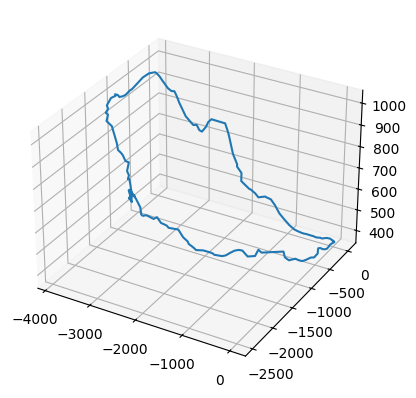

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot( x,y,z )
plt.show()

**Evaluate the integral**

*This is not complete - add dx, dy, Iy, Iz and the final output, I*

In [ ]:
dx = np.diff(x) # the x component of the line element between x[i] and x[i+1]
dy = np.diff(y)        # the y component
dz = np.diff(z)        # the z compoment
[Bx, By, Bz] = myfield( x, y, z ) # the components of the field at all points along the path

Ix = np.sum( Bx[0:-1] * dx ) # the x component of the integral
Iy = np.sum( By[0:-1] * dy )
Iz = np.sum( Bz[0:-1] * dz )
I = Ix+Iy+Iz

print ("The total value of the integral is", I)

The total value of the integral is 8935.181186195347
